In [1]:
import numpy as np
import os,tqdm
import os
import sys
sys.path.append('/home/ash/deeplab/')
import numpy as np
from PIL import Image
from torch.utils import data
import torch
from torchvision import transforms


In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import cv2

In [66]:
target_path ='F:/Small_Obstacle_Dataset/train\\file_3\\labels\\0000000493.png'
temp = target_path.split('labels')
temp
img_path = temp[0] + 'image' + temp[1]

In [70]:
_target = np.asarray(Image.open(target_path))
_img = np.asarray(Image.open(img_path))[:, :, :3]

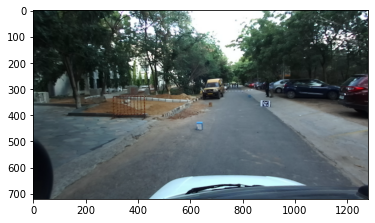

In [71]:
plt.imshow(_img)

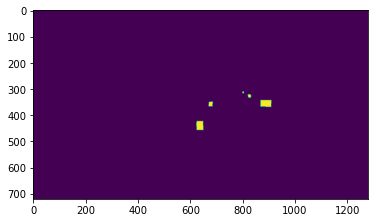

In [74]:
plt.imshow(_target>1)

In [50]:
mask = _target > 1
print(mask.sum())
plt.imshow(mask)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

278221


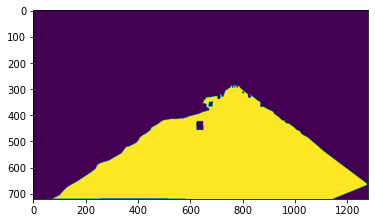

In [54]:
mask = _target == 1
print(mask.sum())
plt.imshow(mask)

640997


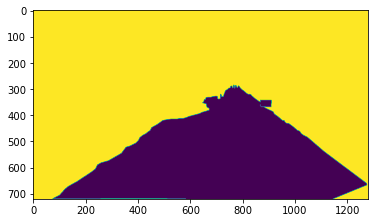

In [53]:
mask = _target == 0
print(mask.sum())
plt.imshow(mask)

640997


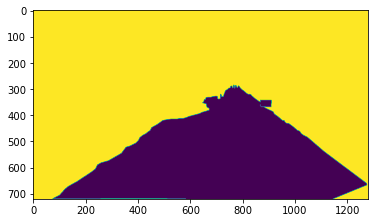

In [53]:
mask = _target == 4
print(mask.sum())
plt.imshow(mask)

2341


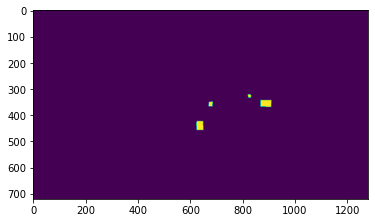

In [61]:
mask = _target == 5
print(mask.sum())
plt.imshow(mask)

41


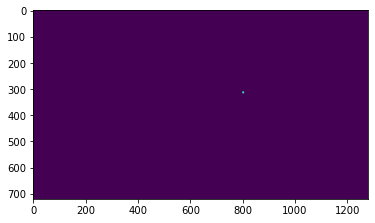

In [59]:
mask = _target ==7
print(mask.sum())
plt.imshow(mask)

# 清洗标签


In [75]:
import numpy.ma as ma


In [101]:
mask = _target>1
mask.sum()

2382

In [77]:
_target.sum()

290213

In [83]:
tmp = np.ones_like(tmp)

In [82]:
tmp.shape

(720, 1280)

In [83]:
tmp = np.ones_like(tmp)

In [84]:
tmp.sum()

919259

In [85]:
_target.sum()

290213

In [86]:
_target[mask]

array([5, 5, 5, ..., 5, 5, 5], dtype=uint8)

In [87]:
ma.masked_array(_target, mask=mask)

SyntaxError: cannot assign to function call (<ipython-input-87-3dc53b4e8c36>, line 1)

In [107]:
tmp = ma.masked_array(_target, mask=mask,fill_value=2)
tmp

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=2,
  dtype=uint8)

In [108]:
tmp = ma.fix_invalid(tmp)
tmp

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=2,
  dtype=uint8)

In [113]:
tmp.filled(fill_value=2)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [114]:
tmp.max()

1